In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['flowers'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowers
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.flowers.unique()

array([0, 1, 2])

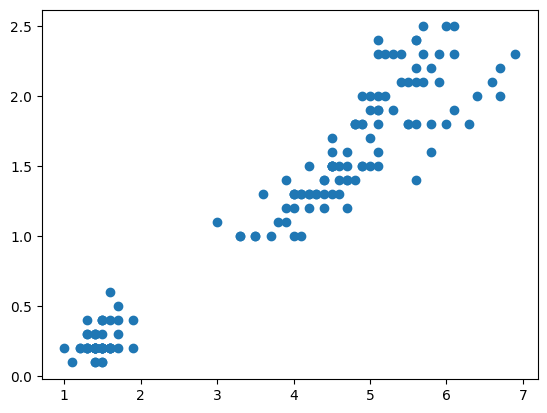

In [11]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [13]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flowers'], axis='columns', inplace=True)
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [14]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
df['clusters'] = y_pred 
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [18]:
df['clusters'].unique()

array([1, 0, 2])

In [20]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

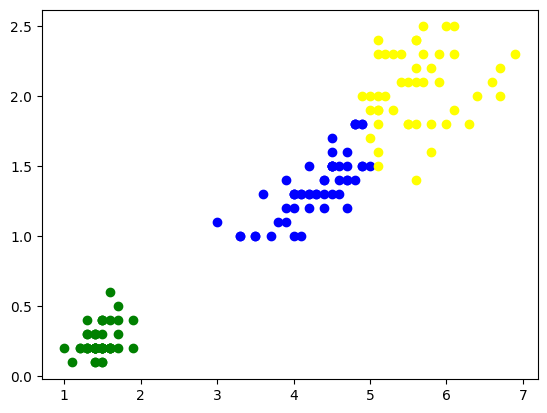

In [21]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [23]:
scaler = MinMaxScaler() 
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [24]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

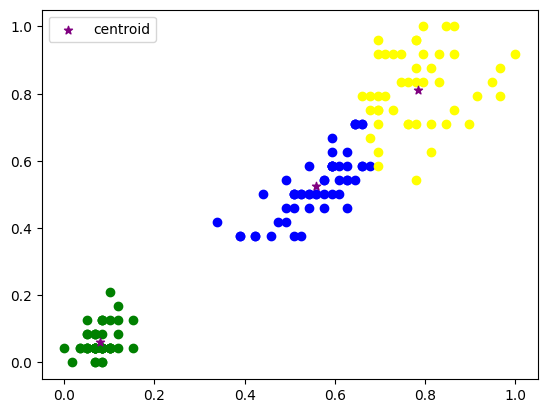

In [27]:
df['clusters'] = y_pred
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color="purple", marker='*', label='centroid')
plt.legend()

Text(0, 0.5, 'Sum of squared error')

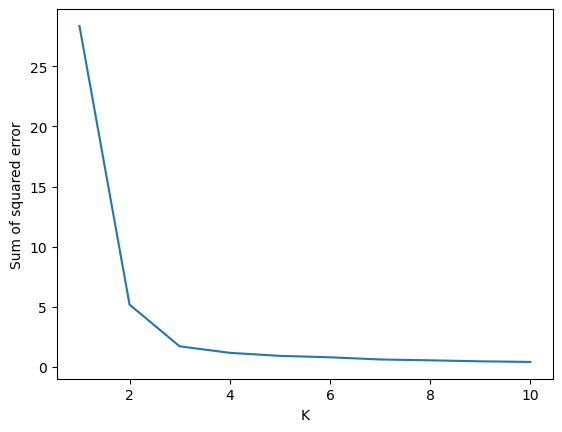

In [29]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')